<a href="https://colab.research.google.com/github/ZemelakGoraga/Data-Analytics-Capstone/blob/main/2ndShare_Cattle%20Import%20Quantity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Topic:** "Unveiling Global Cattle Import Patterns: Insights from
FAOSTAT's Dataset"

**Step 1. Understanding the Business Objective**

**Business Objective:**

To optimize cattle import strategies for different countries by analyzing historical data, identifying trends and anomalies, predicting future import quantities, and recommending prescriptive actions to maximize efficiency.

**Step 2. Formulating business Questions:**


**Questions to address:**

1. Descriptive Question:
What is the trend in import quantity of cattle across different countries over the years?

2. Diagnostic Question:
Are there specific years or countries where there have been significant changes in cattle import quantity?

3. Predictive Question:
Can we predict the future import quantity of cattle for a specific country?

4. Prescriptive Question:
What strategies can be implemented to optimize cattle import quantities while considering different countries and years?

**Step 3. Data Collection & inspection:**

In [ ]:
# Data Collection
# Loading datasets from Kaggle
from google.colab import files
files.upload() # here the downloded kaggle.json file is imported

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zemelak","key":"08c8054de361c9898298da09f2007bec"}'}

In [ ]:
# Next
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json


# Next
# Next, install the Kaggle API client.
!pip install -q kaggle

# Next
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


-rw-r--r-- 1 root root 63 Aug 17 05:44 kaggle.json


In [ ]:
# Next

# List the datasets
# 'kaggle datasets download -d unitednations/global-food-agriculture-statistics' this is the specific database we want to download from kaggle. N.B it may have multiple datasets. check

!kaggle datasets download -d unitednations/global-food-agriculture-statistics


 98% 435M/444M [00:04<00:00, 70.9MB/s]
100% 444M/444M [00:04<00:00, 97.9MB/s]


In [ ]:
# unzip the different data files
# There are above 150 tables in the following zip file

import zipfile

# Specify the path to the downloaded ZIP file
zip_file_path = "/content/global-food-agriculture-statistics.zip"

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the list of file paths within the ZIP archive
    file_paths = zip_ref.namelist()

# Print the list of file paths
for path in file_paths:
    print(path)


current_FAO/__MACOSX/raw_files/._ASTI_Research_Spending_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._ASTI_Researchers_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._CommodityBalances_Crops_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._ConsumerPriceIndices_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._Deflators_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Crop_Residues_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissi

In [ ]:
# Download a specific table to work with
# Here, I will download the following table, which contains imported live animals and products:
#  Table to download: "current_FAO/raw_files/Trade_LiveAnimals_E_All_Data_(Normalized).csv", and save it as df
# Display the first 5 rows of this dataset

import pandas as pd
from zipfile import ZipFile

# Specify the CSV file to read from the ZIP archive
csv_file_to_read = "current_FAO/raw_files/Trade_LiveAnimals_E_All_Data_(Normalized).csv"

# Read the ZIP archive
with ZipFile("/content/global-food-agriculture-statistics.zip", 'r') as zip_file:
    # List the files within the ZIP archive (to double-check paths)
    print(zip_file.namelist())

    # Read the CSV file from the ZIP archive with the specified encoding and delimiter
    with zip_file.open(csv_file_to_read) as csv_file:
        df = pd.read_csv(csv_file, encoding='ISO-8859-1')


['current_FAO/__MACOSX/raw_files/._ASTI_Research_Spending_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._ASTI_Researchers_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._CommodityBalances_Crops_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._ConsumerPriceIndices_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._Deflators_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Crop_Residues_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv', 'curr

In [ ]:
# Viewing Data: display the first 5 rows of the df dataset

print(df.head())


   Area Code         Area  Item Code    Item  Element Code          Element  \
0          2  Afghanistan        866  Cattle          5608  Import Quantity   
1          2  Afghanistan        866  Cattle          5608  Import Quantity   
2          2  Afghanistan        866  Cattle          5608  Import Quantity   
3          2  Afghanistan        866  Cattle          5608  Import Quantity   
4          2  Afghanistan        866  Cattle          5608  Import Quantity   

   Year Code  Year  Unit  Value Flag  
0       1961  1961  Head    NaN    M  
1       1962  1962  Head    NaN    M  
2       1963  1963  Head    NaN    M  
3       1964  1964  Head    NaN    M  
4       1965  1965  Head    NaN    M  


In [ ]:
# Display the last 5 rows of the df dataset

print(df.tail())

        Area Code                                     Area  Item Code  \
662953       5817  Net Food Importing Developing Countries       1922   
662954       5817  Net Food Importing Developing Countries       1922   
662955       5817  Net Food Importing Developing Countries       1922   
662956       5817  Net Food Importing Developing Countries       1922   
662957       5817  Net Food Importing Developing Countries       1922   

                   Item  Element Code       Element  Year Code  Year  \
662953  Sheep and Goats          5922  Export Value       2009  2009   
662954  Sheep and Goats          5922  Export Value       2010  2010   
662955  Sheep and Goats          5922  Export Value       2011  2011   
662956  Sheep and Goats          5922  Export Value       2012  2012   
662957  Sheep and Goats          5922  Export Value       2013  2013   

            Unit      Value Flag  
662953  1000 US$   456293.0    A  
662954  1000 US$   421311.0    A  
662955  1000 US$   6493

In [ ]:
#Understanding the Structure
# Get the number of rows and columns : the data set has 662958 rows and 11 columns
num_rows, num_cols = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_cols}")



Number of rows: 662958
Number of columns: 11


In [ ]:
# Display column names
print("\nColumn names:")
print(df.columns)



Column names:
Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Year Code', 'Year', 'Unit', 'Value', 'Flag'],
      dtype='object')


In [ ]:
# Display data types of columns
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
dtype: object


In [ ]:
# Display unique values count for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nPotential Data Quality Issues (Categorical Columns):")
for column in categorical_columns:
    unique_values_count = df[column].nunique()
    print(f"{column}: {unique_values_count} unique values")



Potential Data Quality Issues (Categorical Columns):
Area: 252 unique values
Item: 25 unique values
Element: 4 unique values
Unit: 4 unique values
Flag: 5 unique values


In [ ]:
# Viewing unique values within each column

unique_areas = df['Area'].unique()

unique_items = df['Item'].unique()

unique_elements = df['Element'].unique()

unique_flags = df['Flag'].unique()

unique_years = df['Year'].unique()

print("Unique Areas:", unique_areas)

print("Unique Items:", unique_items)

print("Unique Elements:", unique_elements)

print("Unique Flags:", unique_flags)

print("Year:", unique_years)


Unique Areas: ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Ethio

In [ ]:
# As we can see above, 'Elements' column contains these 4 unique values: ['Import Quantity' 'Import Value' 'Export Quantity' 'Export Value']
# However, I am interested in analyzing the ' Import Quantity' values
# Similarly, the 'Item' column contains 25 unique values (live animals and products including cattle), but I am interested in live cattle import quantity
# So, I need to filter the df dataset where 'Item' == 'Cattle' and 'Element' == 'Cattle' as shown below:
# Furthermore, only ['Area', 'Item', 'Element', 'Year', 'Unit', 'Value'] columns are required for the analysis
# First, let us filter the df dataset by 'Element' == 'Import Quantity' and save it as 'df_imported_quantity.csv'

selected_columns = ['Area', 'Item', 'Element', 'Year', 'Unit', 'Value']
df_import_quantity = df[df['Element'] == 'Import Quantity'][selected_columns]

print("Selected Data:")
print(df_import_quantity)

# Save as df_import_quantity.csv
df_import_quantity.to_csv('df_import_quantity.csv', index=False)

# Display the first five rows of df_import_quantity
print(df_import_quantity.head())

Selected Data:
                                           Area             Item  \
0                                   Afghanistan           Cattle   
1                                   Afghanistan           Cattle   
2                                   Afghanistan           Cattle   
3                                   Afghanistan           Cattle   
4                                   Afghanistan           Cattle   
...                                         ...              ...   
662794  Net Food Importing Developing Countries  Sheep and Goats   
662795  Net Food Importing Developing Countries  Sheep and Goats   
662796  Net Food Importing Developing Countries  Sheep and Goats   
662797  Net Food Importing Developing Countries  Sheep and Goats   
662798  Net Food Importing Developing Countries  Sheep and Goats   

                Element  Year  Unit      Value  
0       Import Quantity  1961  Head        NaN  
1       Import Quantity  1962  Head        NaN  
2       Import Quanti

In [ ]:
# Display the last five rows of df_import_quantity
print(df_import_quantity.tail())


                                           Area             Item  \
662794  Net Food Importing Developing Countries  Sheep and Goats   
662795  Net Food Importing Developing Countries  Sheep and Goats   
662796  Net Food Importing Developing Countries  Sheep and Goats   
662797  Net Food Importing Developing Countries  Sheep and Goats   
662798  Net Food Importing Developing Countries  Sheep and Goats   

                Element  Year  Unit      Value  
662794  Import Quantity  2009  Head  2443476.0  
662795  Import Quantity  2010  Head  2885658.0  
662796  Import Quantity  2011  Head  2702259.0  
662797  Import Quantity  2012  Head  3301420.0  
662798  Import Quantity  2013  Head  2998137.0  


In [ ]:
# Let us check if the column ' Element' in the df1 dataset contains only one unique value which is 'import_quantity'
unique_elements = df_import_quantity['Element'].unique()
print("Unique Elements:", unique_elements)

Unique Elements: ['Import Quantity']


In [ ]:
# So, next the 'df_import_quantity' dataset is filtered by column 'Item' === Cattle
# Save the filtered dataset as 'df_import_quantity_cattle'

selected_columns = ['Area', 'Item', 'Element', 'Year', 'Unit', 'Value']
df_import_quantity_cattle = df_import_quantity[df_import_quantity['Item'] == 'Cattle'][selected_columns]

print("Selected Data:")
print(df_import_quantity_cattle)

# Save as cattle.csv
df_import_quantity_cattle.to_csv('df_import_quantity_cattle.csv', index=False)

# Display the first few rows of df_import_quantity_cattle
print(df_import_quantity_cattle.head())

Selected Data:
                                           Area    Item          Element  \
0                                   Afghanistan  Cattle  Import Quantity   
1                                   Afghanistan  Cattle  Import Quantity   
2                                   Afghanistan  Cattle  Import Quantity   
3                                   Afghanistan  Cattle  Import Quantity   
4                                   Afghanistan  Cattle  Import Quantity   
...                                         ...     ...              ...   
660038  Net Food Importing Developing Countries  Cattle  Import Quantity   
660039  Net Food Importing Developing Countries  Cattle  Import Quantity   
660040  Net Food Importing Developing Countries  Cattle  Import Quantity   
660041  Net Food Importing Developing Countries  Cattle  Import Quantity   
660042  Net Food Importing Developing Countries  Cattle  Import Quantity   

        Year  Unit      Value  
0       1961  Head        NaN  
1       

In [ ]:
# Display the last few rows of df_import_quantity_cattle
print(df_import_quantity_cattle.tail())

                                           Area    Item          Element  \
660038  Net Food Importing Developing Countries  Cattle  Import Quantity   
660039  Net Food Importing Developing Countries  Cattle  Import Quantity   
660040  Net Food Importing Developing Countries  Cattle  Import Quantity   
660041  Net Food Importing Developing Countries  Cattle  Import Quantity   
660042  Net Food Importing Developing Countries  Cattle  Import Quantity   

        Year  Unit      Value  
660038  2009  Head  1113191.0  
660039  2010  Head  1599145.0  
660040  2011  Head  1311693.0  
660041  2012  Head  1649940.0  
660042  2013  Head  2217707.0  


In [ ]:
# So, this will be the dataset to be used for final analysis after the cleaning and further data processing steps
# the data set has 11280 rows and 6 columns
df_import_quantity_cattle.shape

(11280, 6)

In [ ]:
# for the sake of simplicity, the 'df_import_quantity_cattle' dataset was saved as df1 as follows:


# Assuming df_import_quantity_cattle exists
df1 = df_import_quantity_cattle.copy()  # Make a copy of the DataFrame if you want to save it as df1

# Save the DataFrame as a CSV file
df1.to_csv('df1.csv', index=False)  # Index=False prevents saving the row indices

In [ ]:
# check if the df1 dataset is the same as the 'df_import_quantity_cattle' as follows
# So, use df1 for the remaining data processing and analysis steps
df1.shape

(11280, 6)

**Step 4. Data Cleaning:**

In [ ]:
# Check for missing values in each column
missing_values = df1.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Missing Values:
Area         0
Item         0
Element      0
Year         0
Unit         0
Value      686
dtype: int64


In [ ]:

# Display potential data quality issues (min-max range) for numerical columns
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns
print("\nPotential Data Quality Issues (Numerical Columns):")
for column in numerical_columns:
    column_range = df1[column].max() - df1[column].min()
    print(f"{column}: Range = {column_range}")


Potential Data Quality Issues (Numerical Columns):
Year: Range = 52
Value: Range = 11022746.0


In [ ]:
# Impute missing values
# Impute missing values with mean for numerical columns
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns
df1[numerical_columns] = df1[numerical_columns].fillna(df1[numerical_columns].mean())

In [ ]:
# check missing values were replaced by the 'mean' values
# Check for missing values in each column
missing_values = df1.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Area       0
Item       0
Element    0
Year       0
Unit       0
Value      0
dtype: int64


In [ ]:
# Removing Duplicates: Check for and remove duplicate rows using df.duplicated() and df.drop_duplicates().
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
660038    False
660039    False
660040    False
660041    False
660042    False
Length: 11280, dtype: bool

In [ ]:
df1.drop_duplicates()

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,Cattle,Import Quantity,1961,Head,1.829629e+05
1,Afghanistan,Cattle,Import Quantity,1962,Head,1.829629e+05
2,Afghanistan,Cattle,Import Quantity,1963,Head,1.829629e+05
3,Afghanistan,Cattle,Import Quantity,1964,Head,1.829629e+05
4,Afghanistan,Cattle,Import Quantity,1965,Head,1.829629e+05
...,...,...,...,...,...,...
660038,Net Food Importing Developing Countries,Cattle,Import Quantity,2009,Head,1.113191e+06
660039,Net Food Importing Developing Countries,Cattle,Import Quantity,2010,Head,1.599145e+06
660040,Net Food Importing Developing Countries,Cattle,Import Quantity,2011,Head,1.311693e+06
660041,Net Food Importing Developing Countries,Cattle,Import Quantity,2012,Head,1.649940e+06


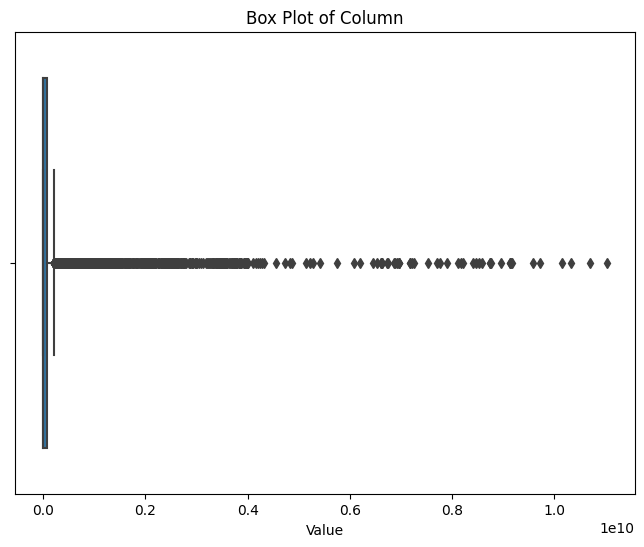

In [ ]:
# Outliers: Identify and handle outliers by using visualization tools or statistical methods.
# Detect data outliers and anomalies: Box Plots: Outliers appear as individual data points outside the whiskers.
#The 'Value' Column represents number of heads of imported live cattle, actual value for each row is = Value * 1000

import matplotlib.pyplot as plt
import seaborn as sns


# Box plot for a specific column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['Value']*1000)
plt.title('Box Plot of Column')
plt.show()




**Step 5. Data Transformation:**

In [ ]:
# Address data outliers and anomalies using appropriate techniques.
# Apply log transformation

import pandas as pd
import numpy as np

df1['Value'] = df1['Value'].apply(lambda x: np.log(x) if x > 0 else x)


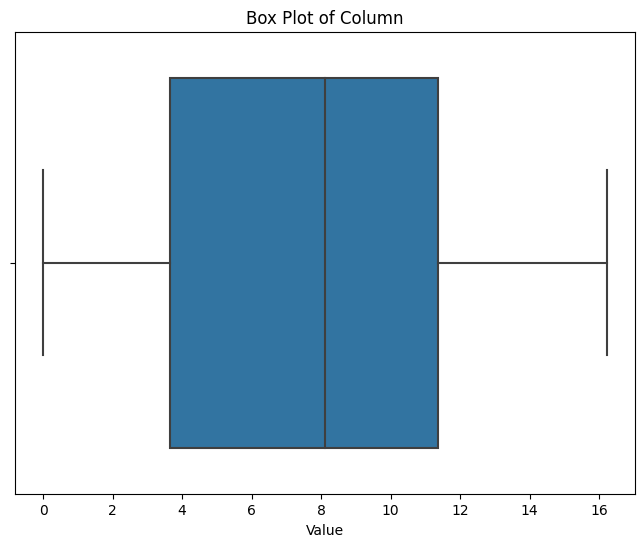

In [ ]:
# check the data outliers and anomalies after the log transformation using Box Plots
#The 'Value' Column represents number of heads of imported live cattle, actual value for each row is = Value * 1000

import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for a specific column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['Value'])
plt.title('Box Plot of Column')
plt.show()